In [1]:
import numpy as np
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
import matplotlib.pylab as plt
import csv

print(tf.__version__)

2.6.0


In [2]:
#download 5-flowers dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)
data_dir = pathlib.Path(data_dir)

In [3]:
#count photos of dataset
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


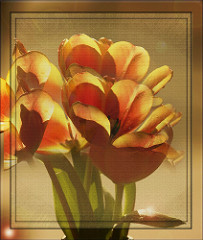

In [4]:
#open some samples of classes
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[2]))

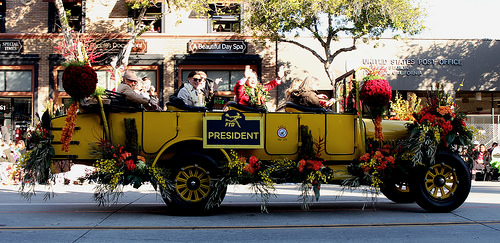

In [5]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

In [6]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3

reshape_dims = [IMG_HEIGHT,IMG_WIDTH]

#read and decode dataset
def read_and_decode(filename, reshape_dims):
  # 1.Read the file
  img = tf.io.read_file(filename)

  # 2.Convert the compressed string to a 3D uint8 tensor.
  img = tf.image.decode_jpeg(img, channels=IMG_CHANNELS)

  # 3.Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)

  # 4.Resize the image to the desired size.
  return tf.image.resize(img, reshape_dims)


In [7]:
CLASS_NAMES = [item.numpy().decode("utf-8") for item in
               tf.strings.regex_replace(
                 tf.io.gfile.glob("/Users/zhuzhirui/.keras/datasets/flower_photos/*"),
                 "/Users/zhuzhirui/.keras/datasets/flower_photos/", "")]
print(CLASS_NAMES)

#save all of elements which have not '.' , ignore all of elements which have '.'
CLASS_NAMES = [item for item in CLASS_NAMES if item.find(".") == -1]
print(CLASS_NAMES)

['roses', '.DS_Store', 'sunflowers', 'daisy', 'train_set.csv', 'eval_set.csv', 'dandelion', 'tulips', 'LICENSE.txt']
['roses', 'sunflowers', 'daisy', 'dandelion', 'tulips']


/Users/zhuzhirui/.keras/datasets/flower_photos/roses/8983268106_dc913d17d8_m.jpg


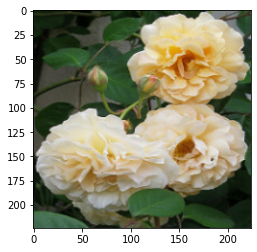

In [8]:
def show_image(filepath):
    img = read_and_decode(filepath,[IMG_HEIGHT,IMG_WIDTH])
    #image --> TensorFlow tensor

    plt.imshow(img.numpy())

roses = list(data_dir.glob('roses/*'))
print(roses[5])
show_image(str(roses[5]))


/Users/zhuzhirui/.keras/datasets/flower_photos/tulips/5700466891_2bcb17fa68_n.jpg
/Users/zhuzhirui/.keras/datasets/flower_photos/tulips/14087792403_f34f37ba3b_m.jpg
/Users/zhuzhirui/.keras/datasets/flower_photos/tulips/3446285408_4be9c0fded_m.jpg
/Users/zhuzhirui/.keras/datasets/flower_photos/tulips/16282277874_b92776b194.jpg
/Users/zhuzhirui/.keras/datasets/flower_photos/tulips/8748266132_5298a91dcf_n.jpg


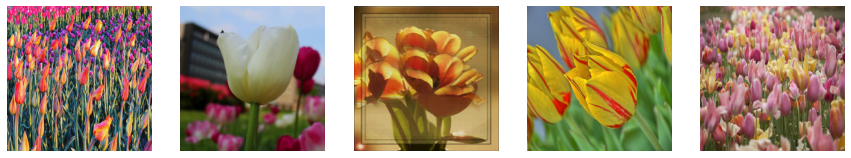

In [9]:
#display 5 images in a row
tulips = tf.io.gfile.glob(str(data_dir)+'/tulips/*.jpg')
f,ax = plt.subplots(1,5,figsize=(15,15))
for idx, filepath in enumerate(tulips[:5]):
    print(filepath)
    img = read_and_decode(filepath, [IMG_HEIGHT, IMG_WIDTH])
    ax[idx].imshow(img.numpy())
    ax[idx].axis('off')

/Users/zhuzhirui/.keras/datasets/flower_photos/tulips/5700466891_2bcb17fa68_n.jpg
/Users/zhuzhirui/.keras/datasets/flower_photos/tulips/14087792403_f34f37ba3b_m.jpg
/Users/zhuzhirui/.keras/datasets/flower_photos/tulips/3446285408_4be9c0fded_m.jpg
/Users/zhuzhirui/.keras/datasets/flower_photos/tulips/16282277874_b92776b194.jpg
/Users/zhuzhirui/.keras/datasets/flower_photos/tulips/8748266132_5298a91dcf_n.jpg


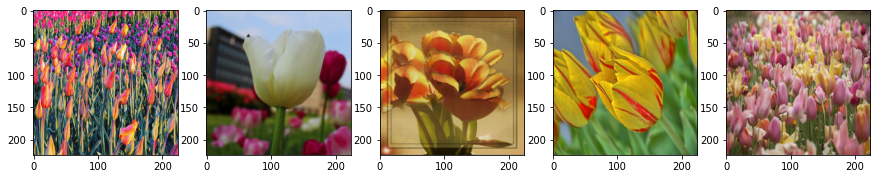

In [10]:
#display 5 images in a row
tulips = tf.io.gfile.glob(str(data_dir)+'/tulips/*.jpg')
f,ax = plt.subplots(1,5,figsize=(15,15))
for idx, filepath in enumerate(tulips[:5]):
    print(filepath)
    img = read_and_decode(filepath, [IMG_HEIGHT, IMG_WIDTH])
    ax[idx].imshow(img.numpy())

/Users/zhuzhirui/.keras/datasets/flower_photos/dandelion/4669815582_0a994fb4fd_m.jpg
/Users/zhuzhirui/.keras/datasets/flower_photos/dandelion/8475769_3dea463364_m.jpg
/Users/zhuzhirui/.keras/datasets/flower_photos/dandelion/4571923094_b9cefa9438_n.jpg
/Users/zhuzhirui/.keras/datasets/flower_photos/dandelion/19621170705_30bf8bf0ba.jpg
/Users/zhuzhirui/.keras/datasets/flower_photos/dandelion/5033866477_a77cccba49_m.jpg


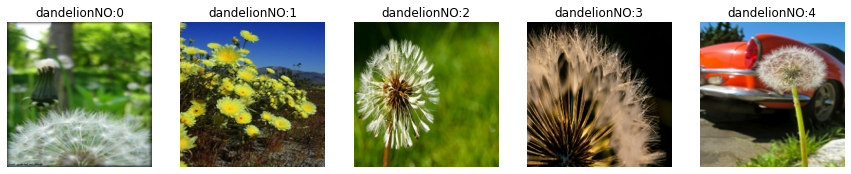

In [11]:
#display 5 images in a raw with labels
dandelion = tf.io.gfile.glob(str(data_dir)+'/dandelion/*.jpg')
f,ax = plt.subplots(1,5,figsize=(15,15))
for idx,filepath in enumerate(dandelion[10:15]):
    print(filepath)
    img = read_and_decode(filepath, [IMG_HEIGHT, IMG_WIDTH])
    ax[idx].imshow(img.numpy())
    ax[idx].set_title('dandelionNO:{}'.format(idx))
    ax[idx].axis('off')

/Users/zhuzhirui/.keras/datasets/flower_photos/dandelion/4669815582_0a994fb4fd_m.jpg
/Users/zhuzhirui/.keras/datasets/flower_photos/dandelion/8475769_3dea463364_m.jpg
/Users/zhuzhirui/.keras/datasets/flower_photos/dandelion/4571923094_b9cefa9438_n.jpg
/Users/zhuzhirui/.keras/datasets/flower_photos/dandelion/19621170705_30bf8bf0ba.jpg
/Users/zhuzhirui/.keras/datasets/flower_photos/dandelion/5033866477_a77cccba49_m.jpg


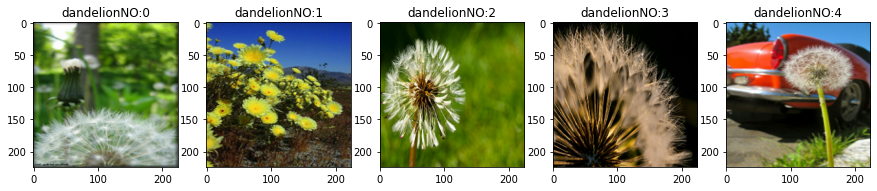

In [12]:
#display 5 images in a raw with labels
dandelion = tf.io.gfile.glob(str(data_dir)+'/dandelion/*.jpg')
f,ax = plt.subplots(1,5,figsize=(15,15))
for idx,filepath in enumerate(dandelion[10:15]):
    print(filepath)
    img = read_and_decode(filepath, [IMG_HEIGHT, IMG_WIDTH])
    ax[idx].imshow(img.numpy())
    ax[idx].set_title('dandelionNO:{}'.format(idx))

In [13]:
#extract the label
basename = tf.strings.regex_replace(
    tf.io.gfile.glob(str(data_dir) + '/*'),str(data_dir),''
)
print(basename)
label = tf.strings.split(basename,'/')
print(label)

tf.Tensor(
[b'/roses' b'/.DS_Store' b'/sunflowers' b'/daisy' b'/train_set.csv'
 b'/eval_set.csv' b'/dandelion' b'/tulips' b'/LICENSE.txt'], shape=(9,), dtype=string)
<tf.RaggedTensor [[b'', b'roses'], [b'', b'.DS_Store'], [b'', b'sunflowers'], [b'', b'daisy'], [b'', b'train_set.csv'], [b'', b'eval_set.csv'], [b'', b'dandelion'], [b'', b'tulips'], [b'', b'LICENSE.txt']]>


In [14]:
label = tf.strings.split(basename,'/')[2]
print(label)

tf.Tensor([b'' b'sunflowers'], shape=(2,), dtype=string)


In [15]:
label = tf.strings.split(basename,'/')[2][1]
print(label)

tf.Tensor(b'sunflowers', shape=(), dtype=string)


In [17]:
#decode each line of CSV file : img->tensor by path, and extract the label
def decode_csv(csv_row):
  record_defaults = ["path", "flower"]
  rowpath, label_string = tf.io.decode_csv(csv_row,record_defaults)
  img = read_and_decode(rowpath,reshape_dims)
  #label = tf.math.equal(CLASS_NAMES, label_string)
  return img, label_string

#read each line of CSV file by decode function
#return a tuple
dataset = (tf.data.TextLineDataset(
    str(data_dir) + '/train_set.csv').map(decode_csv))

#show first 3 samples of dataset
for img, label in dataset.take(3):
  avg = tf.math.reduce_mean(img, axis=[0,1]) # average pixel in the image
  print(label, avg)
#The label is a string tensor and the average is a 1D tensor of length 3

tf.Tensor(b'roses', shape=(), dtype=string) tf.Tensor([0.43073034 0.4026535  0.35183167], shape=(3,), dtype=float32)
tf.Tensor(b'roses', shape=(), dtype=string) tf.Tensor([0.3047887  0.33345404 0.31590527], shape=(3,), dtype=float32)
tf.Tensor(b'roses', shape=(), dtype=string) tf.Tensor([0.48204944 0.43514034 0.3242844 ], shape=(3,), dtype=float32)
